# 📝 Exercise M4.01

The aim of this exercise is two-fold:

* understand the parametrization of a linear model;
* quantify the fitting accuracy of a set of such models.

We will reuse part of the code of the course to:

* load data;
* create the function representing a linear model.

## Prerequisites

### Data loading

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [59]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[feature_name], penguins[target_name]
target

0      3750.0
1      3800.0
2      3250.0
3      3450.0
4      3650.0
        ...  
337    4000.0
338    3400.0
339    3775.0
340    4100.0
341    3775.0
Name: Body Mass (g), Length: 342, dtype: float64

### Model definition

In [60]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

Define a vector `weights = [...]` and a vector `intercepts = [...]` of the
same length. Each pair of entries `(weights[i], intercepts[i])` tags a
different model. Use these vectors along with the vector
`flipper_length_range` to plot several linear models that could possibly fit
our data. Use the above helper function to visualize both the models and the
real samples.

In [61]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)

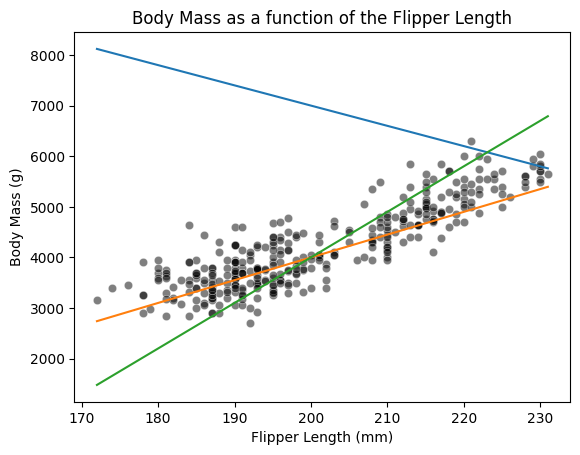

In [67]:
import seaborn as sns

# weights = [*range(0, 80, 10)]

# intercepts = [*range(1000, 5000, 500)]

weights = [-40, 45, 90]
intercepts = [15000, -5000, -14000]

# print(len(intercepts), len(weights))
ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
for weight, intercept in zip(weights, intercepts):
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept
    )

    ax.plot(flipper_length_range, predicted_body_mass)
    ax.set_title(f"Body Mass as a function of the Flipper Length")

In the previous question, you were asked to create several linear models. The
visualization allowed you to qualitatively assess if a model was better than
another.

Now, you should come up with a quantitative measure which indicates the
goodness of fit of each linear model and allows you to select the best model.
Define a function `goodness_fit_measure(true_values, predictions)` that takes
as inputs the true target values and the predictions and returns a single
scalar as output.

In [73]:
def goodness_fit_measure(true_values, predictions):
    subtract = true_values - predictions
    return subtract.abs().mean() #mae

You can now copy and paste the code below to show the goodness of fit for each
model.

```python
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")
```

In [75]:
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")


Model #0:
-40.00 (g / mm) * flipper length + 15000.00 (g)
Error: 2764.854

Model #1:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 338.523

Model #2:
90.00 (g / mm) * flipper length + -14000.00 (g)
Error: 573.041

